<a href="https://colab.research.google.com/github/fralfaro/MAT281_2022/blob/main/labs/lab_08/lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°08



<a id='p1'></a>
## I.- Problema 01


<img src="https://freedesignfile.com/upload/2013/06/Car-logos-1.jpg" width="360" height="360" align="center"/>


El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [65]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [67]:
# cargar datos
df = pd.read_csv("/content/data/vehiculos_procesado_con_grupos.csv", sep=",")\
       .drop(
            ["fabricante", 
             "modelo",
             "transmision", 
             "traccion", 
             "clase", 
             "combustible",
             "consumo"], 
    
          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

### 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables categoricas a numericas ocupando el comando **get_dummies** de pandas ([referencia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**. 


In [68]:
df_num = df.select_dtypes(include='number')
df_num = df_num.fillna(df_num.mean())
MM = MinMaxScaler()
df_num_MM = MM.fit_transform(df_num)
df_num_MM = pd.DataFrame(df_num_MM, columns=df_num.columns)

df_cat = df.select_dtypes(include=['object','category'])
df_cat_gd = pd.get_dummies(df_cat)

df_procesado = pd.concat([df_num_MM, df_cat_gd], axis=1)

### 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de **8 clusters**.
2. Asociar a cada individuo el correspondiente cluster y calcular valor de los centroides de cada cluster.
3. Realizar un resumen de las principales cualidades de cada cluster. Para  esto debe calcular (para cluster) las siguientes medidas de resumen:
    * Valor promedio de las variables numérica
    * Moda para las variables numericas
    
    

In [70]:
KM = KMeans(n_clusters=8)
KM.fit(df_procesado)
Cluster = pd.DataFrame(KM.predict(df_procesado), columns=["Cluster"])  
Centroides  = KM.cluster_centers_
df_procesado = pd.concat([df_procesado, Cluster], axis=1)


proms = []
i=0
while(i<8):
  f = []
  aux = df_procesado["Cluster"]==i
  aux = df_num_MM[aux]
  f = [aux.mean()]
  proms.append(f)
  i += 1

print("Promedios")
i=0
for e in proms:
  print("Cluster: ", i)
  print(e)
  i+=1

print("Centroides")
i=0
for e in Centroides:
  print("Centroide: ", i)
  print(e)
  i+=1

Promedios
Cluster:  0
[year                    0.384236
desplazamiento          0.585590
cilindros               0.430797
co2                     0.510289
consumo_litros_milla    0.454503
dtype: float64]
Cluster:  1
[year                    0.438404
desplazamiento          0.159576
cilindros               0.141184
co2                     0.242287
consumo_litros_milla    0.156504
dtype: float64]
Cluster:  2
[year                    0.409092
desplazamiento          0.333846
cilindros               0.258067
co2                     0.354202
consumo_litros_milla    0.281278
dtype: float64]
Cluster:  3
[year                    0.588065
desplazamiento          0.362121
cilindros               0.299467
co2                     0.354068
consumo_litros_milla    0.282213
dtype: float64]
Cluster:  4
[year                    0.452443
desplazamiento          0.562730
cilindros               0.405562
co2                     0.501887
consumo_litros_milla    0.442585
dtype: float64]
Cluster:  5
[year   

### 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una ve realizado el gráfico, saque sus propias conclusiones del caso.


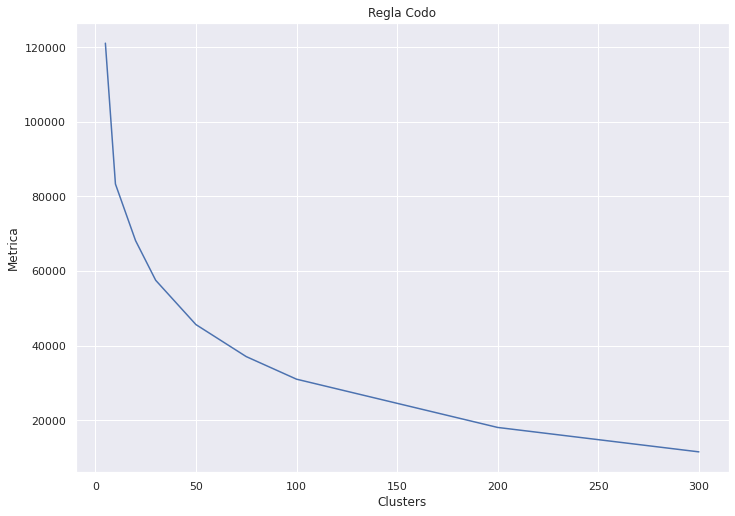

In [71]:
Clusters = [5,10,20,30,50,75,100,200,300]
Metrica = []

for e in Clusters:
  KM = KMeans(n_clusters=e)
  KM.fit(df_procesado)
  Metrica.append(KM.inertia_)

plt.plot(Clusters, Metrica)
plt.title("Regla Codo")
plt.xlabel("Clusters")
plt.ylabel("Metrica")
plt.show()

Una vez graficado con la metrica (suma cuadrados de la distancia al cluster mas proximo) podemos ver que el codo se alcanza con 50 clusters, osea es el punto en donde la metrica deja de disminuir su valor de forma drastica por lo que seria nuestra opcion ideal de cantidad de clusters

## II.- Problema 02

<img src="https://live.staticflickr.com/7866/47075467621_85ab810139_c.jpg" align="center"/>

Para el conjunto de datos de **Iris**, se pide realizar una reducción de dimensionalidad ocupando las técnicas de PCA y TSNE (vistas en clases). 

El objetivo es aplicar ambos algoritmos de la siguiente manera:

* Análisis detallado algoritma PCA (tablas, gráficos, etc.)
* Análisis detallado algoritma TSNE (tablas, gráficos, etc.)
* Comparar ambos algoritmos (conclusiones del caso)

In [72]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [73]:
dataset = load_iris()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'

iris = pd.DataFrame(
    dataset.data,
    columns=features)

iris[target] = dataset.target
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Matriz Covarianza: 
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]

Valores propios: 
 [2.93808505 0.9201649  0.14774182 0.02085386]
Vectores propios: 
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]




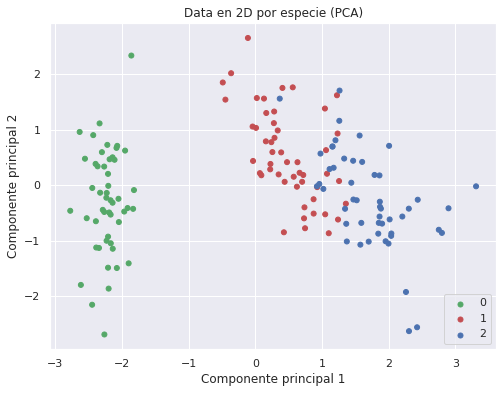

In [74]:
#PRIMERO PCA
x4 = iris.iloc[:,0:4].values
y0 = iris.iloc[:,4].values
x4_n = StandardScaler().fit_transform(x4)
Mcov = np.cov(x4_n.T)
print("Matriz Covarianza: \n", Mcov)

eig_vals, eig_vecs = np.linalg.eig(Mcov)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
print("\nValores propios: \n", eig_vals)
print("Vectores propios: \n", eig_vecs)
print("\n")

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))
y = x4_n.dot(matrix_w)
N = y0.shape[0]

area = np.full(N, 25)
area0 = np.ma.masked_where(y0!=0, area)
area1 = np.ma.masked_where(y0!=1, area)
area2 = np.ma.masked_where(y0!=2, area)
xf = []
yf = []
for e in y:
  xf.append(e[0])
  yf.append(e[1])

plt.figure(figsize=(8, 6))
sc = plt.scatter(xf, yf, s=area0, c = "g", label="0")
sc = plt.scatter(xf, yf, s=area1, c = "r", label="1")
sc = plt.scatter(xf, yf, s=area2, c = "b", label="2")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.title("Data en 2D por especie (PCA)")
plt.legend(loc='lower right')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


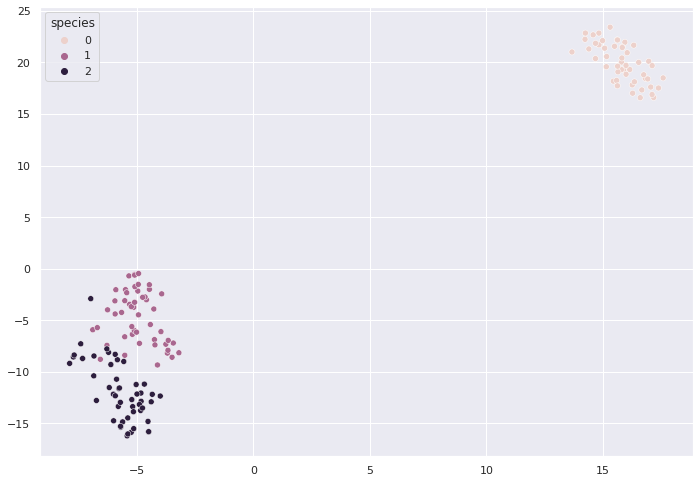

In [75]:
#AHORA TSNE
tsne = TSNE(random_state = 0)
iris_t = tsne.fit_transform(iris.drop("species", axis = 1))
sns.scatterplot(iris_t[:, 0], iris_t[:, 1], hue = iris.species);